In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_dataset.csv to final_dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/final_dataset.csv')

<ipython-input-1-e8d8339b9ec9>:2: DtypeWarning: Columns (6,7,8,10,12,13,14,16,17,18,66,88,116,119,127,133,135,140,142,153,158,159,162,164,165,167,168,170,179,182,185,188,193,195,197,199,201,203,206,209,212,214,217,221,223,226,228,230,233,236,238,240,242,244,247,250,255,275,277,284,287,297,299,302,307,309,316,318,322,327,330,332,336,340,348,351,359,361,363,365,368,370,378,380,387,389,390,392,394,398) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/final_dataset.csv')


In [ ]:
df.head()

,OccNo,OccID,ComponentSeq,SuspectedComponentFailureIND,TestPerformedIND,PartNameID,PartNameID_DisplayEng,Manufacturer,Model,TrainSeq,...,EmployeeFatalInjuries,EmployeeSeriousInjuries,EmployeeMinorInjuries,RSPassengerFatalInjuries,RSPassengerSeriousInjuries,RSPassengerMinorInjuries,TotalRSPassengerInjuries,OtherFatalInjuries,OtherSeriousInjuries,OtherMinorInjuries
0,R15T0302,122705,1.0,1.0,0.0,36.0,BODY BOLSTER,TRINITY,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,R15T0300,122703,1.0,1.0,0.0,36.0,BODY BOLSTER,TRINITY,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,R15T0164,121813,1.0,1.0,0.0,34.0,"BEARING, ROLLER",NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R15T0017,121029,1.0,1.0,NaN,104.0,WHEEL RIM,GRIFFIN WHEEL CO,CH 36,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,R13T0075,118024,1.0,1.0,NaN,65.0,ENGINE,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_selected = df[['OccID', 'Summary']]  # Select only these two columns

# Save the new dataset under a different name
df_selected.to_csv("filtered_file.csv", index=False)

print("New file with only 'occ_id' and 'summary' saved as 'filtered_file.csv'")

New file with only 'occ_id' and 'summary' saved as 'filtered_file.csv'


In [ ]:
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
def preprocess_text_basic(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W+', ' ', text)  # Removing non-alphabetic characters
    return text

In [ ]:
df['Summary'] = df['Summary'].fillna('')  # Replace NaN with empty strings
df['Summary'] = df['Summary'].astype(str)  # Convert all entries to string


In [ ]:
df['Processed_Summary'] = df['Summary'].apply(preprocess_text_basic)



In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Processed_Summary'])

In [ ]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)



LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
def display_topics(model, feature_names, num_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        topics.append(f"Topic {topic_idx + 1}: " + ", ".join(words))
    return topics

topics = display_topics(lda, vectorizer.get_feature_names_out(), 5)
topics

['Topic 1: track, unit, rail, derailed, switch',
 'Topic 2: cp, reported, cars, train, cn',
 'Topic 3: cn, mile, sub, cp, track',
 'Topic 4: vehicle, crossing, struck, police, train',
 'Topic 5: car, product, cn, leaking, load']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the 'Summary' column
df['Processed_Summary'] = df['Summary'].apply(preprocess_text)

# Vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df['Processed_Summary'])

# LDA Model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 0:
train cp mile cn injury sub struck proceeding trespasser unit
Topic 1:
car cn product load reported responded leaking prox injury residue
Topic 2:
crossing vehicle struck train injury cn public reported equipped responded
Topic 3:
train track cn cp stop injury mile switch movement signal
Topic 4:
car reported cn injury track derailed cp yard train assignment


In [ ]:
pip install gensim

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Create a dictionary and corpus for gensim
texts = [text.split() for text in df['Processed_Summary']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)
# Evaluate coherence
coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.6355459521138892


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


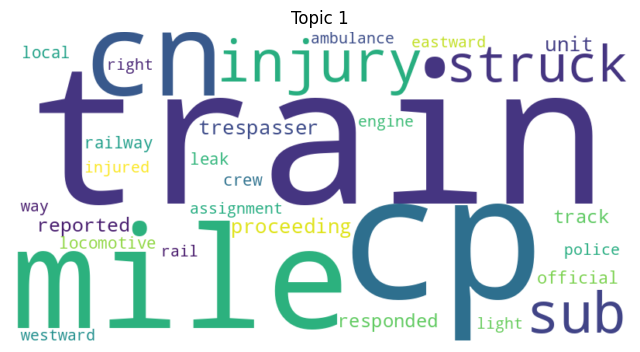

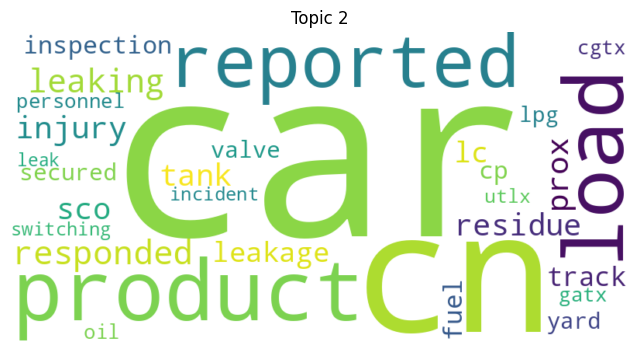

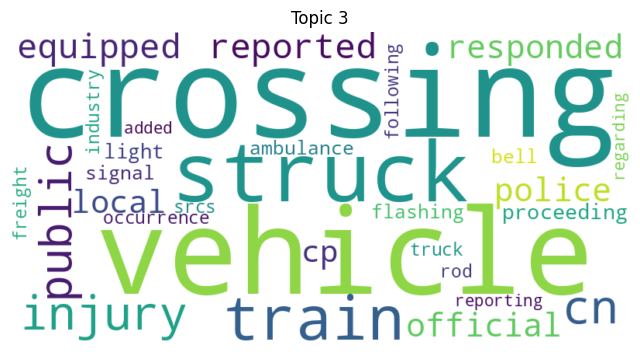

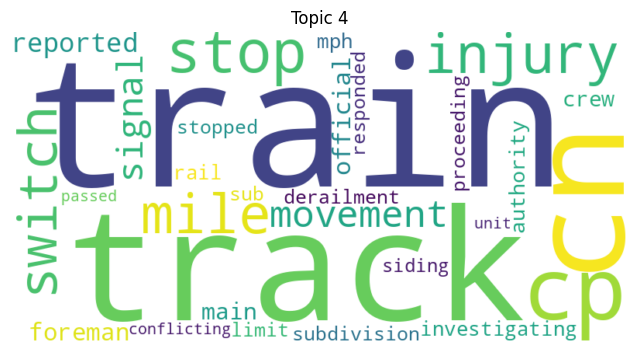

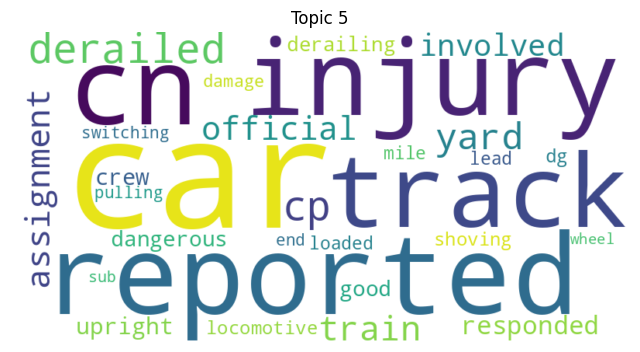

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate word clouds for each topic
def plot_word_clouds(lda_model, feature_names, num_topics):
    for topic_idx, topic in enumerate(lda_model.components_):
        plt.figure(figsize=(8, 6))

        # Get top words and their weights
        word_freqs = {feature_names[i]: topic[i] for i in topic.argsort()[:-30 - 1:-1]}

        # Generate word cloud
        wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_freqs)

        # Plot
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Topic {topic_idx + 1}")
        plt.show()

# Generate word clouds
plot_word_clouds(lda, vectorizer.get_feature_names_out(), num_topics=5)


In [ ]:
pip install --upgrade pyLDAvis


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim.corpora import Dictionary

# Convert sklearn's CountVectorizer matrix (dtm) into a format suitable for Gensim
texts = [text.split() for text in df['Processed_Summary']]  # Tokenized text
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Convert sklearn's LDA model to a Gensim-compatible format
gensim_lda = gensim.models.LdaModel(
    corpus=corpus, id2word=dictionary, num_topics=5, random_state=42
)

# Prepare the visualization
lda_vis = gensimvis.prepare(gensim_lda, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
